In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [2]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [3]:
# Save X data
X = mnist.data
# Encode our target
y = mnist.target

In [4]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)
scaled_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## No PCA Used

In [5]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
knn = KNeighborsClassifier()

In [7]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [8]:
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1,5),
              'kneighborsclassifier__p': range(1,2),
              'kneighborsclassifier__weights': ['balanced', 'uniform']}

In [9]:
knn_model = make_pipeline(scaler, knn)
knn_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [10]:
# Creating GridSearchCV
knn_pipe_gs = GridSearchCV(knn_model, knn_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters: ')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

C:\Users\miran\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\miran\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\miran\anaconda3\envs\dojo-env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\miran\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py", line 205, in 

Best KNN Parameters: 
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9598285714285715


In [11]:
%%time
preds_no_pca = best_pipe.predict(X_test)
preds_no_pca 

CPU times: total: 9min 30s
Wall time: 34.5 s


array(['8', '4', '8', ..., '5', '8', '2'], dtype=object)

## PCA Used

In [12]:
scaled_df = scaler.fit_transform(X)
scaled_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [14]:
pd.Series(pca.explained_variance_ratio_) 

0      5.642719e-02
1      4.041226e-02
2      3.738273e-02
3      2.893000e-02
4      2.520752e-02
           ...     
779    2.363771e-34
780    2.305027e-34
781    4.880660e-35
782    2.607596e-35
783    2.228381e-35
Length: 784, dtype: float64

C:\Users\miran\AppData\Local\Temp\ipykernel_37524\3485588572.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


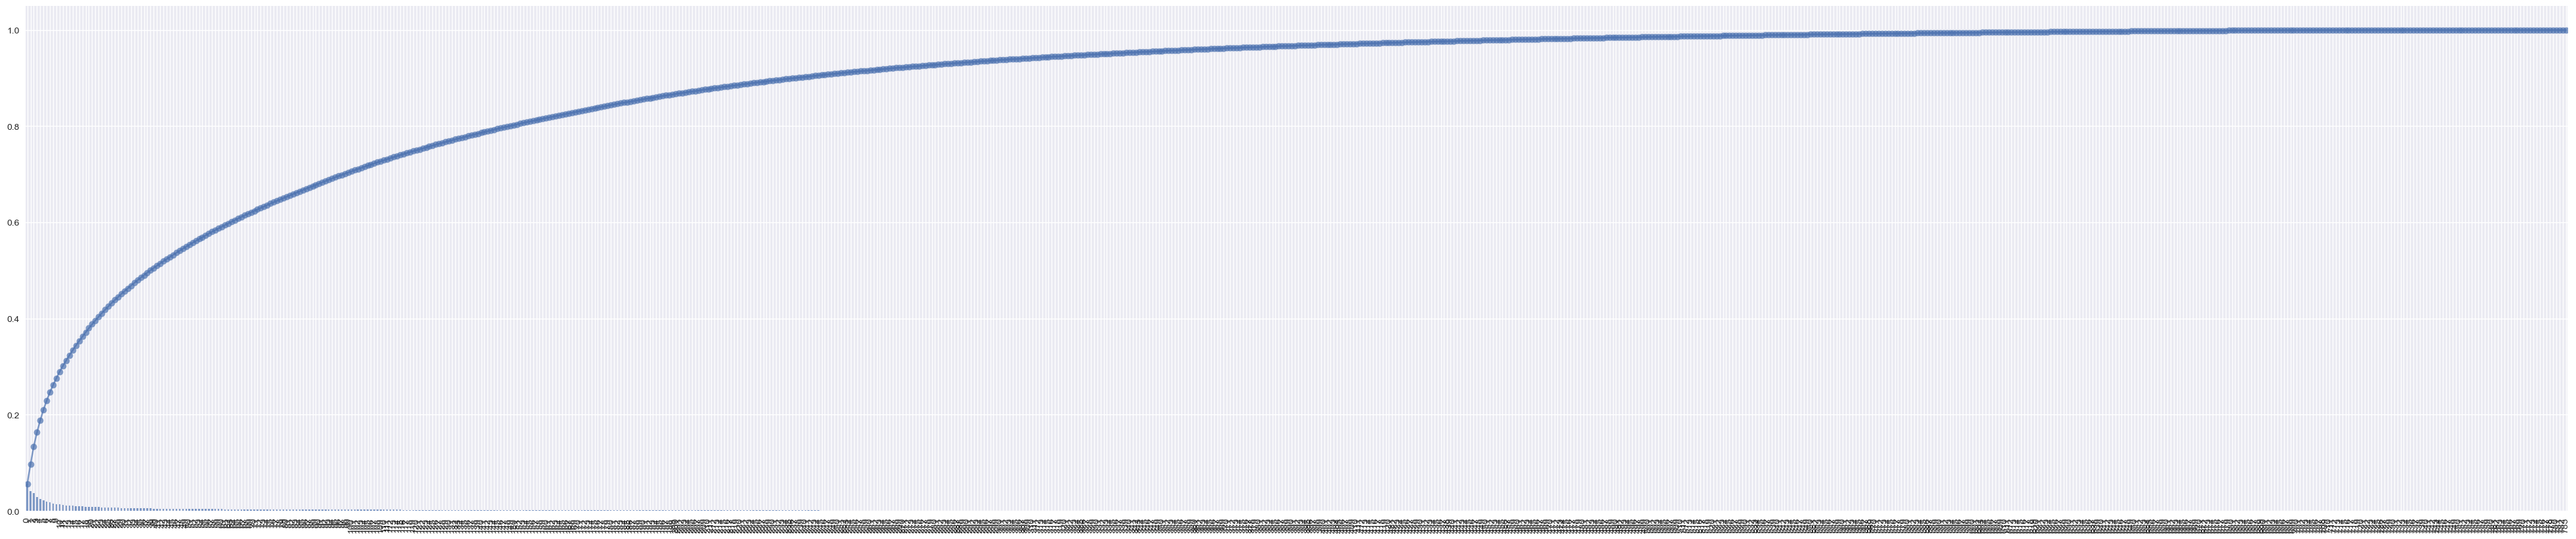

In [15]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(50,10))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 
plt.xticks(rotation=90)
plt.show();

In [16]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=.95),
    KNeighborsClassifier()
    
)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9477714285714286

In [17]:
%%time
preds_pca = pipe.predict(X_test)
print(classification_report(y_test, preds_pca))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.96      0.99      0.97      1977
           2       0.95      0.94      0.94      1761
           3       0.94      0.94      0.94      1806
           4       0.94      0.94      0.94      1587
           5       0.95      0.93      0.94      1607
           6       0.96      0.98      0.97      1761
           7       0.94      0.93      0.94      1878
           8       0.97      0.90      0.93      1657
           9       0.91      0.93      0.92      1752

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500

CPU times: total: 28.3 s
Wall time: 2.31 s


### The KNeighbor model has a 96% while the PCA model has a 95%. I would stick with the Kneighbors as one of my favorite models.